In [ ]:
#Nifty 50 portfolio analytics and research project libraries installations

!pip install kiteconnect
!pip install numpy pandas matplotlib seaborn plotly scikit-learn scipy
!pip install pandas-datareader statsmodels
!pip install pypfopt tqdm
!pip install dash dash-bootstrap-components
!pip install ta jax jaxlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=34796c3f184157b3a91958e51897de4128e09a6074fea2527ce047aa9dfd2dfd
  Stored in directory: /root/.cache/pip/

Kite api authentication

In [ ]:
# Kite API Authentication Setup

from kiteconnect import KiteConnect

API_KEY = "8re7mjcm2btaozwf"
API_SECRET = "fw8gm7wfeclcic9rlkp0tbzx4h2ss2n1"


kite = KiteConnect(api_key=API_KEY)


print("Login URL (open in browser to get request_token):")
print(kite.login_url())


request_token = input("Enter the request_token from the login URL: ")


try:
    data = kite.generate_session(request_token, api_secret=API_SECRET)
    kite.set_access_token(data["access_token"])
    print("Kite API session established successfully!")
except Exception as e:
    print(f"Error generating session: {e}")


Login URL (open in browser to get request_token):
https://kite.zerodha.com/connect/login?api_key=8re7mjcm2btaozwf&v=3
Enter the request_token from the login URL: QFJjKfPMlYZsLx8FBy7yerX6kdyzWAhI
Kite API session established successfully!


Fetch 5 years daily timeframe Nifty50 stock data

In [ ]:
# Saves each stock as a CSV in Google Drive

import pandas as pd
import os
from datetime import datetime, timedelta

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Output folder in Google Drive
output_dir = "/content/drive/MyDrive/Nifty50_OHLC_5Years"
os.makedirs(output_dir, exist_ok=True)

nifty50_symbols = [
    "RELIANCE", "HDFCBANK", "ICICIBANK", "INFY", "TCS", "KOTAKBANK", "HINDUNILVR",
    "SBIN", "BHARTIARTL", "BAJFINANCE", "ITC", "LT", "HCLTECH", "ASIANPAINT",
    "AXISBANK", "MARUTI", "SUNPHARMA", "WIPRO", "ULTRACEMCO", "NTPC", "POWERGRID",
    "NESTLEIND", "TITAN", "BAJAJFINSV", "JSWSTEEL", "ONGC", "HDFCLIFE", "COALINDIA",
    "INDUSINDBK", "CIPLA", "DRREDDY", "TATAMOTORS", "GRASIM", "HINDALCO", "DIVISLAB",
    "TECHM", "ADANIGREEN", "ADANIPORTS", "EICHERMOT", "HEROMOTOCO", "BPCL", "BRITANNIA",
    "APOLLOHOSP", "SHREECEM", "BAJAJ-AUTO", "M&M", "ICICIPRULI", "SBILIFE", "UPL",
    "TATASTEEL", "DLF"
]

# Date range (last 5 years)
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Fetch historical OHLC data for each stock
failed_symbols = []

for symbol in nifty50_symbols:
    try:
        # Fetch daily candles (Kite API returns [timestamp, open, high, low, close, volume])
        ohlc = kite.historical_data(
            instrument_token=kite.ltp(f"NSE:{symbol}")[f"NSE:{symbol}"]["instrument_token"],
            from_date=start_date.strftime("%Y-%m-%d"),
            to_date=end_date.strftime("%Y-%m-%d"),
            interval="day",
            continuous=False
        )

        # Convert to DataFrame
        df = pd.DataFrame(ohlc)

        # Skip if less than ~5 years (1200 trading days) of data
        if len(df) < 1200:
            print(f"Skipping {symbol} (not enough data)")
            continue

        # Save CSV
        csv_path = os.path.join(output_dir, f"{symbol}_5yr_ohlc.csv")
        df.to_csv(csv_path, index=False)
        print(f"Saved {symbol}: {csv_path}")

    except Exception as e:
        print(f"Failed to fetch {symbol}: {e}")
        failed_symbols.append(symbol)

print("\nProcess complete.")
print("Skipped symbols:", failed_symbols)


Mounted at /content/drive
Saved RELIANCE: /content/drive/MyDrive/Nifty50_OHLC_5Years/RELIANCE_5yr_ohlc.csv
Saved HDFCBANK: /content/drive/MyDrive/Nifty50_OHLC_5Years/HDFCBANK_5yr_ohlc.csv
Saved ICICIBANK: /content/drive/MyDrive/Nifty50_OHLC_5Years/ICICIBANK_5yr_ohlc.csv
Saved INFY: /content/drive/MyDrive/Nifty50_OHLC_5Years/INFY_5yr_ohlc.csv
Saved TCS: /content/drive/MyDrive/Nifty50_OHLC_5Years/TCS_5yr_ohlc.csv
Saved KOTAKBANK: /content/drive/MyDrive/Nifty50_OHLC_5Years/KOTAKBANK_5yr_ohlc.csv
Saved HINDUNILVR: /content/drive/MyDrive/Nifty50_OHLC_5Years/HINDUNILVR_5yr_ohlc.csv
Saved SBIN: /content/drive/MyDrive/Nifty50_OHLC_5Years/SBIN_5yr_ohlc.csv
Saved BHARTIARTL: /content/drive/MyDrive/Nifty50_OHLC_5Years/BHARTIARTL_5yr_ohlc.csv
Saved BAJFINANCE: /content/drive/MyDrive/Nifty50_OHLC_5Years/BAJFINANCE_5yr_ohlc.csv
Saved ITC: /content/drive/MyDrive/Nifty50_OHLC_5Years/ITC_5yr_ohlc.csv
Saved LT: /content/drive/MyDrive/Nifty50_OHLC_5Years/LT_5yr_ohlc.csv
Saved HCLTECH: /content/drive/MyDr

Computing daily returns cumulative for each stock and plotting

/tmp/ipython-input-4-2420499096.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_df = price_df.sort_values("date").fillna(method="ffill").dropna()


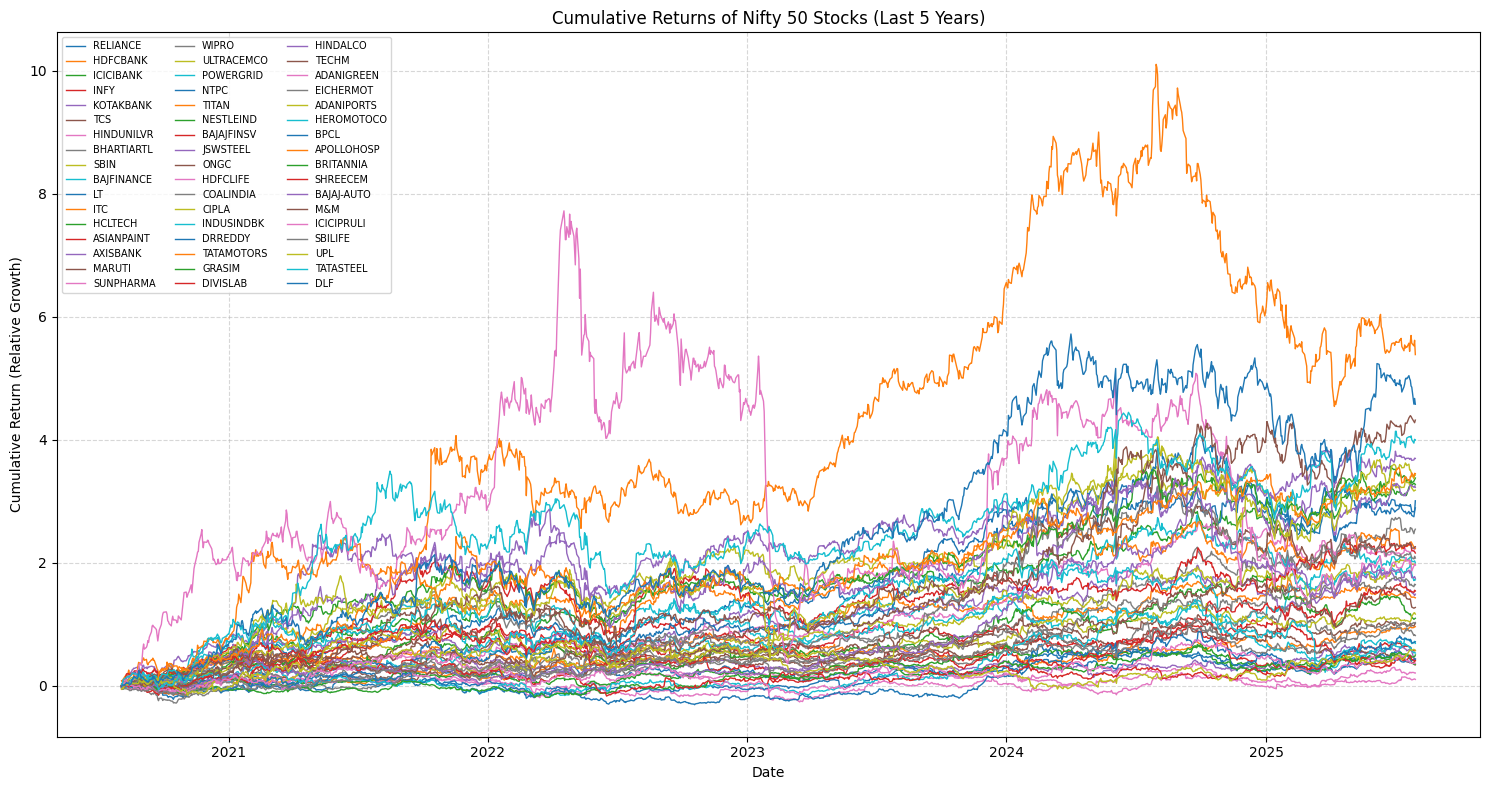

In [ ]:
# Compute cumulative returns over 5 years and plot them

import matplotlib.pyplot as plt
import pandas as pd
import glob

# Path where CSVs were saved
data_path = "/content/drive/MyDrive/Nifty50_OHLC_5Years"

# Combine all CSVs (Close prices only)
all_files = glob.glob(f"{data_path}/*_5yr_ohlc.csv")
price_df = pd.DataFrame()

for file in all_files:
    symbol = file.split("/")[-1].split("_")[0]
    df = pd.read_csv(file, parse_dates=["date"])
    df = df[["date", "close"]].rename(columns={"close": symbol})

    if price_df.empty:
        price_df = df
    else:
        price_df = pd.merge(price_df, df, on="date", how="outer")

# Sort and forward-fill missing values (if any)
price_df = price_df.sort_values("date").fillna(method="ffill").dropna()

# Calculate daily returns
returns_df = price_df.set_index("date").pct_change().dropna()

# Calculate cumulative returns for each stock
cumulative_returns = (1 + returns_df).cumprod() - 1

# Plot cumulative returns with repositioned Y-axis explanation

plt.figure(figsize=(15, 8))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col, linewidth=1)

plt.title("Cumulative Returns of Nifty 50 Stocks (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Relative Growth)")

"""Here on Y-Axis 1 means 100% gains from price at start i.e. 5 years ago. So, 10 would be mean 10*100% gains over the 5 years timeframe"""
# Adjust legend to the upper left corner
plt.legend(loc="upper left", fontsize=7, ncol=3)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




Correlation matrix for all stocks (50x50)

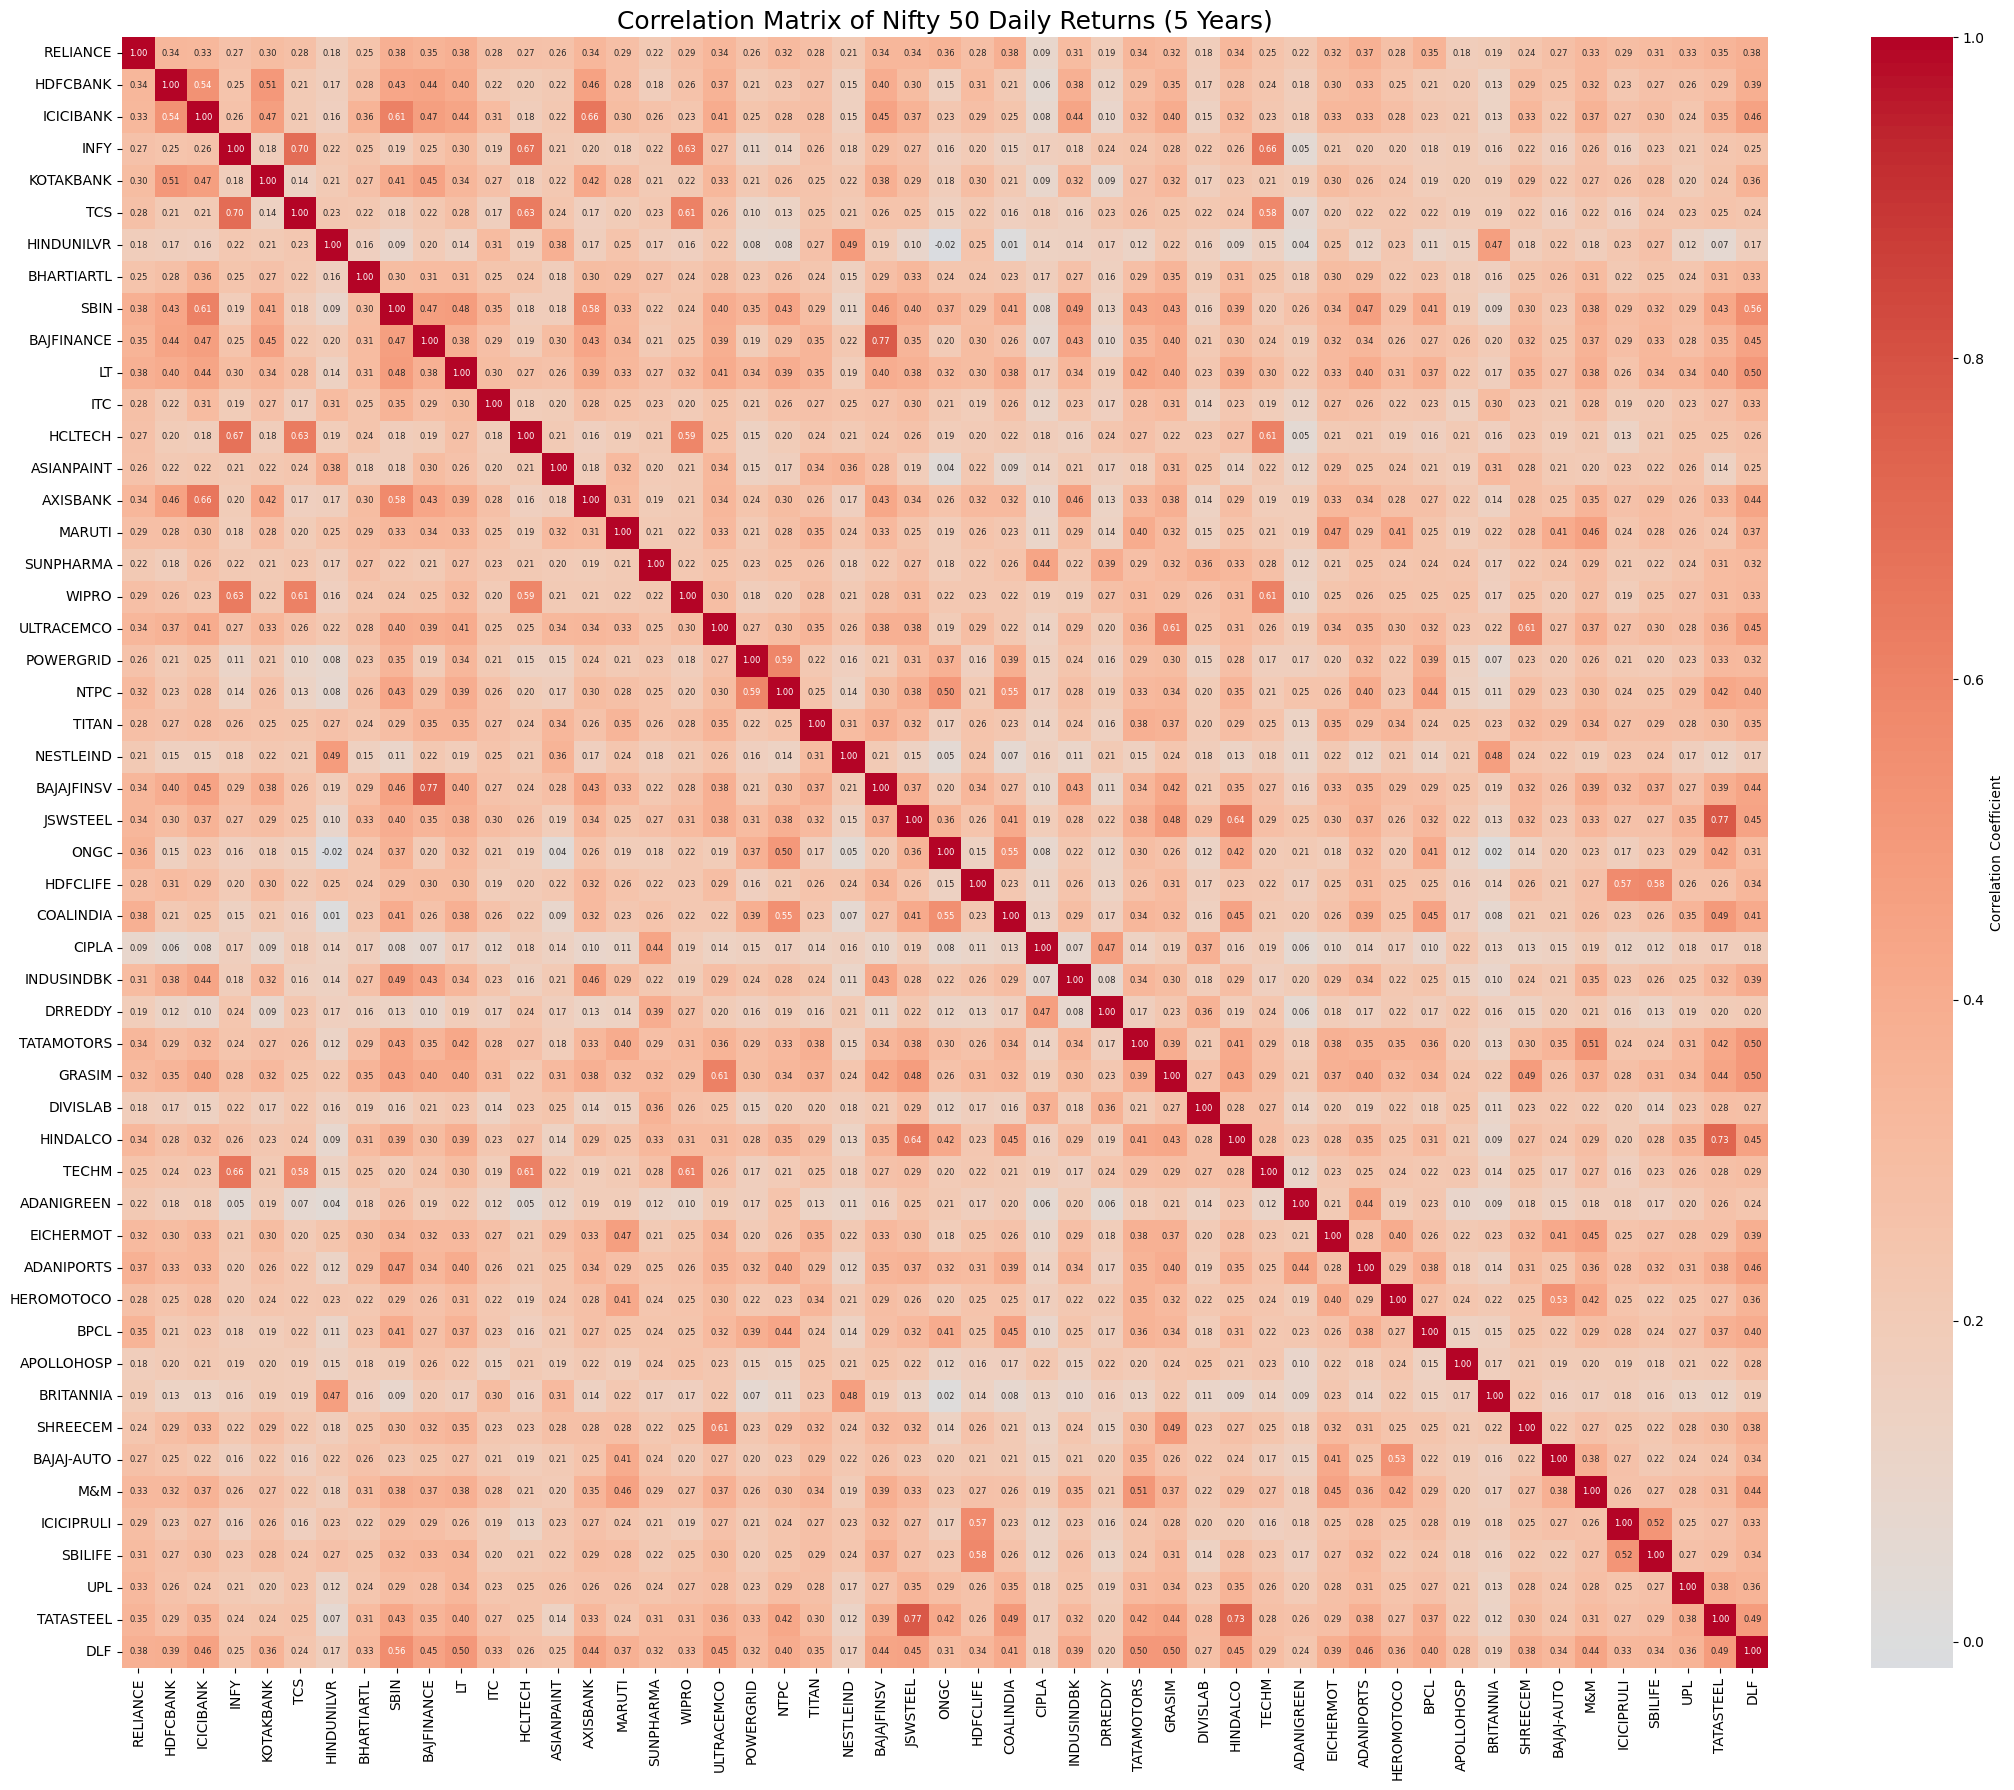

In [ ]:
# Correlation Matrix (50×50) for Nifty 50 Daily Returns

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = returns_df.corr()

# Correlation Matrix (50×50) with annotated coefficients

plt.figure(figsize=(22, 18))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,             # Show correlation values
    fmt=".2f",              # Format: 2 decimal places
    annot_kws={"size": 6},  # Smaller font for readability
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Matrix of Nifty 50 Daily Returns (5 Years)", fontsize=18)
plt.tight_layout()
plt.show()


Stock categorisation by groups

In [ ]:
# Predefined sector mapping for Nifty 50 stocks
# (Can be updated if the index constituents change)

nifty50_sector_map = {
    # Financials
    "HDFCBANK": "Financials", "ICICIBANK": "Financials", "KOTAKBANK": "Financials",
    "SBIN": "Financials", "AXISBANK": "Financials", "BAJFINANCE": "Financials",
    "BAJAJFINSV": "Financials", "INDUSINDBK": "Financials", "HDFCLIFE": "Financials",
    "SBILIFE": "Financials", "ICICIPRULI": "Financials",

    # Information Technology
    "INFY": "IT", "TCS": "IT", "WIPRO": "IT", "HCLTECH": "IT", "TECHM": "IT","BHARTIARTL": "IT",

    # Energy & Utilities
    "RELIANCE": "Energy", "ONGC": "Energy", "NTPC": "Energy", "POWERGRID": "Energy",
    "BPCL": "Energy", "ADANIGREEN": "Energy", "ADANIPORTS": "Energy", "COALINDIA": "Energy",

    # FMCG & Consumer
    "HINDUNILVR": "FMCG", "ITC": "FMCG", "NESTLEIND": "FMCG", "BRITANNIA": "FMCG",
    "TITAN": "Consumer", "ASIANPAINT": "Consumer",

    # Healthcare & Pharma
    "SUNPHARMA": "Pharma", "CIPLA": "Pharma", "DRREDDY": "Pharma", "DIVISLAB": "Pharma",
    "APOLLOHOSP": "Pharma",

    # Industrials & Construction
    "LT": "Industrials", "ULTRACEMCO": "Industrials", "GRASIM": "Industrials",
    "SHREECEM": "Industrials", "DLF": "Industrials", "UPL": "Industrials",

    # Metals & Commodities
    "JSWSTEEL": "Metals", "HINDALCO": "Metals", "TATASTEEL": "Metals",

    # Auto & Transport
    "TATAMOTORS": "Auto", "M&M": "Auto", "EICHERMOT": "Auto", "HEROMOTOCO": "Auto",
    "BAJAJ-AUTO": "Auto", "MARUTI": "Auto",

}

# Verify coverage
all_symbols = list(returns_df.columns)
missing = [s for s in all_symbols if s not in nifty50_sector_map]
if missing:
    print(f"Missing sector mapping for: {missing}")
else:
    print("All Nifty 50 stocks mapped to sectors successfully!")


All Nifty 50 stocks mapped to sectors successfully!


Intra-sector correlation for daily returns

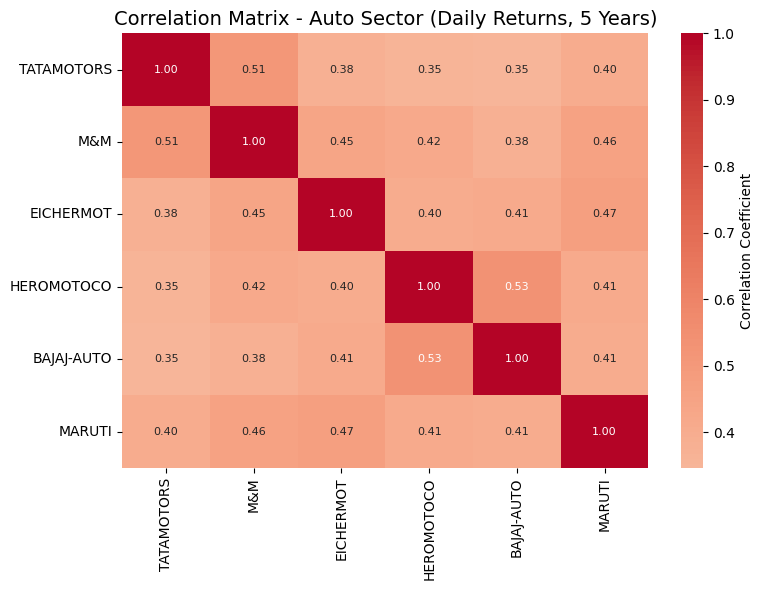

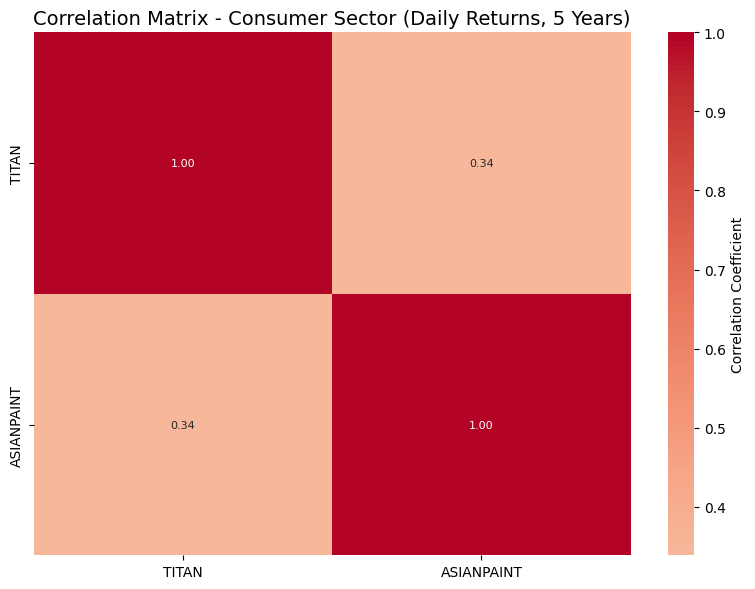

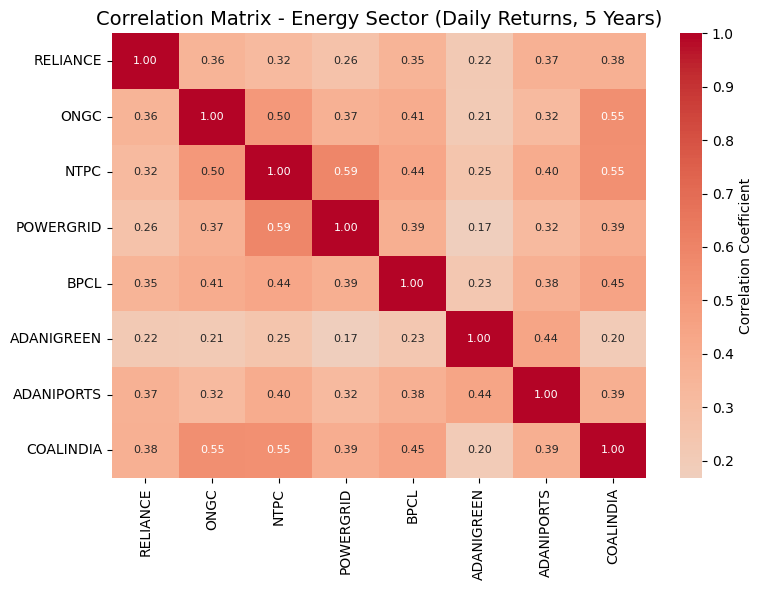

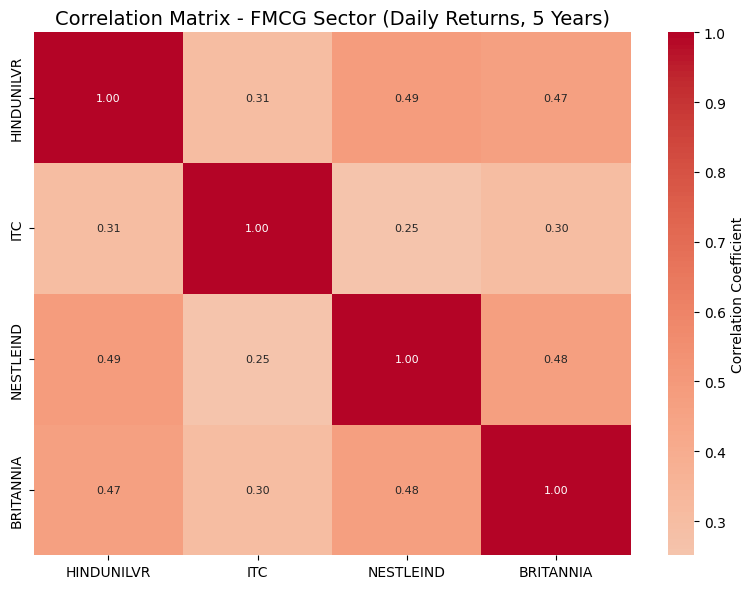

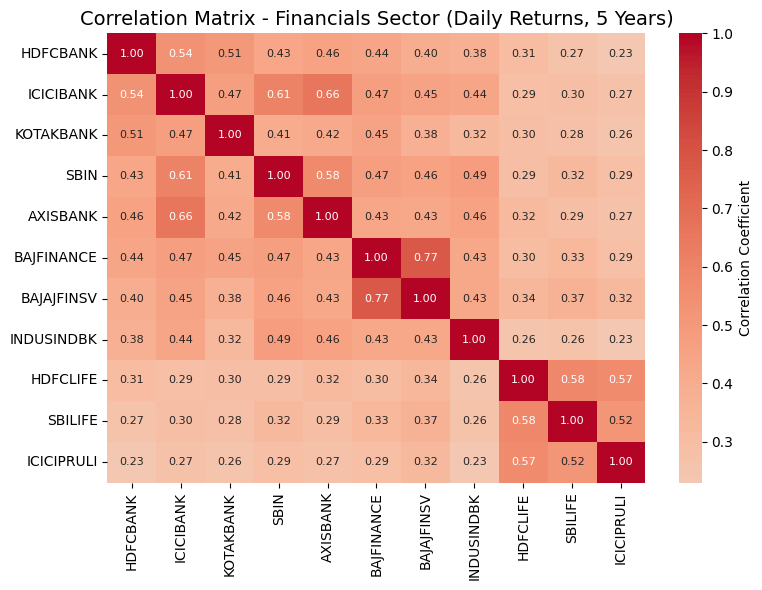

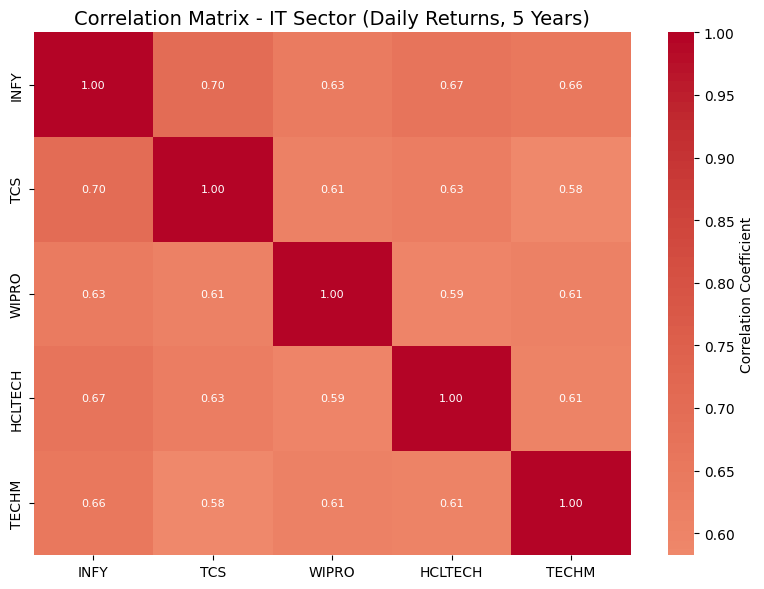

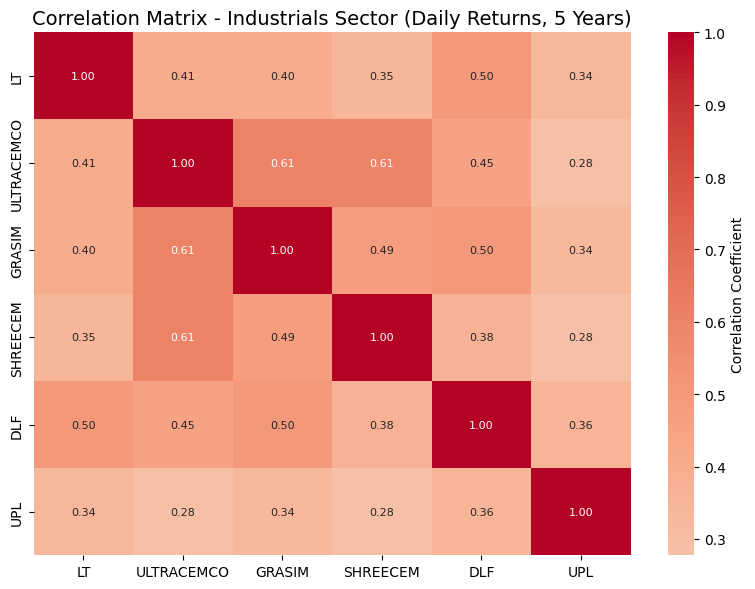

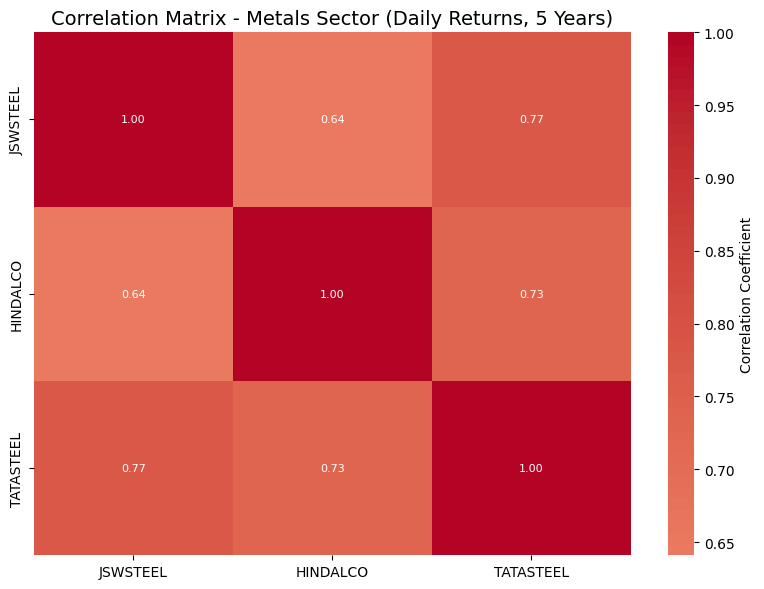

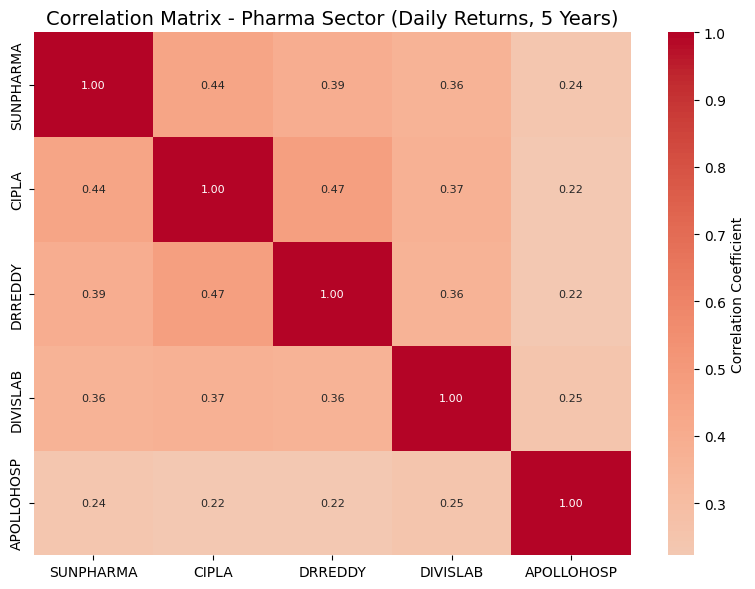

Skipping Telecom (only one stock, cannot form a matrix).


In [ ]:
# Plot sector-wise correlation matrices (heatmaps) for each sector

import seaborn as sns
import matplotlib.pyplot as plt

# Compute overall correlation matrix once
corr_matrix = returns_df.corr()

# Loop through each sector and plot its heatmap
for sector in sorted(set(nifty50_sector_map.values())):
    sector_stocks = [s for s, sec in nifty50_sector_map.items() if sec == sector and s in corr_matrix.columns]

    if len(sector_stocks) < 2:
        print(f"Skipping {sector} (only one stock, cannot form a matrix).")
        continue

    # Extract sector-specific correlation matrix
    sector_corr = corr_matrix.loc[sector_stocks, sector_stocks]

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        sector_corr,
        cmap="coolwarm",
        center=0,
        annot=True,           # Show actual correlation coefficients
        fmt=".2f",
        annot_kws={"size": 8},
        xticklabels=True,
        yticklabels=True,
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    plt.title(f"Correlation Matrix - {sector} Sector (Daily Returns, 5 Years)", fontsize=14)
    plt.tight_layout()
    plt.show()


Inter-sector correlation heatmap

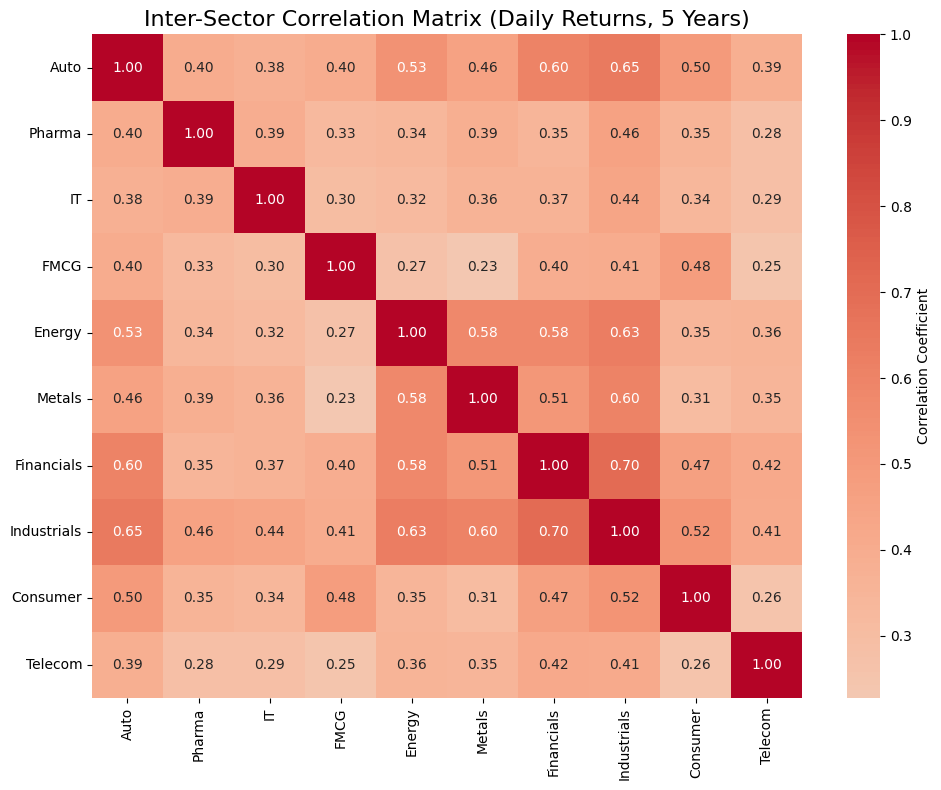

In [ ]:
# Compute Inter-Sector Correlation Matrix (10×10) and plot heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a DataFrame of sector-level average daily returns
sector_returns = pd.DataFrame(index=returns_df.index)

for sector in set(nifty50_sector_map.values()):
    sector_stocks = [s for s, sec in nifty50_sector_map.items() if sec == sector and s in returns_df.columns]

    if len(sector_stocks) == 0:
        continue

    # Compute average return across all stocks in the sector
    sector_returns[sector] = returns_df[sector_stocks].mean(axis=1)

# Step 2: Compute the sector correlation matrix
sector_corr_matrix = sector_returns.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    sector_corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,           # Show correlation coefficients
    fmt=".2f",             # 2 decimal places
    annot_kws={"size": 10},
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Inter-Sector Correlation Matrix (Daily Returns, 5 Years)", fontsize=16)
plt.tight_layout()
plt.show()


Ranking of sector-pair correlation

/tmp/ipython-input-14-1380924299.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_7_pairs["Pair"] = top_7_pairs["Sector 1"] + " - " + top_7_pairs["Sector 2"]


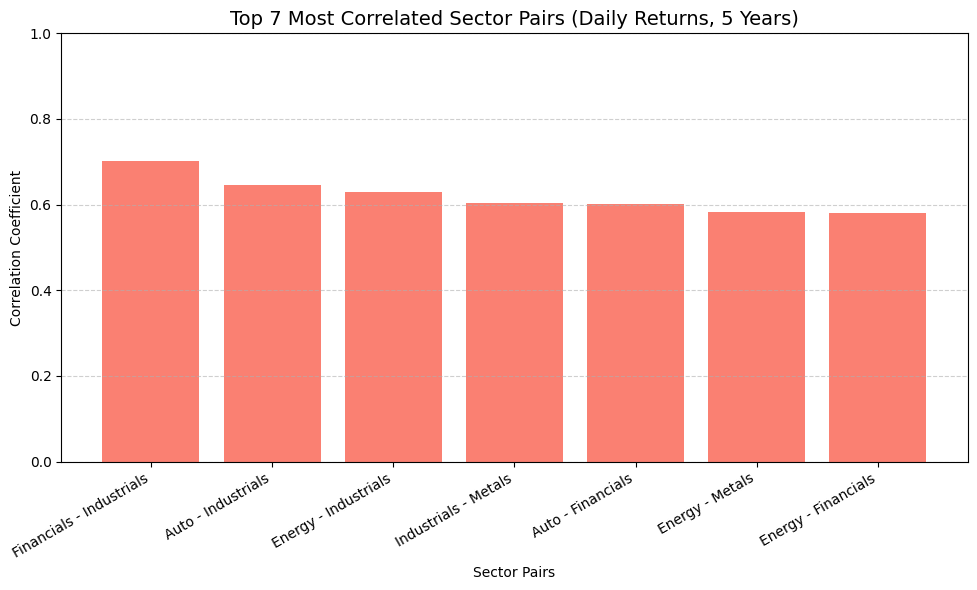

In [ ]:
import numpy as np

# Rank sector pairs by their correlation (excluding self-correlation)

# Mask the diagonal (self-correlation) using NumPy instead of pd.np
sector_corr_pairs = (
    sector_corr_matrix.where(~np.eye(len(sector_corr_matrix), dtype=bool))
    .stack()  # convert to long format
    .reset_index()
)

sector_corr_pairs.columns = ["Sector 1", "Sector 2", "Correlation"]

# Remove duplicate pairs (since correlation matrix is symmetric)
sector_corr_pairs = sector_corr_pairs.loc[sector_corr_pairs["Sector 1"] < sector_corr_pairs["Sector 2"]]

# Sort by correlation (highest to lowest)
sector_corr_pairs = sector_corr_pairs.sort_values(by="Correlation", ascending=False).reset_index(drop=True)

import matplotlib.pyplot as plt

# Select top 7 most correlated sector pairs
top_7_pairs = sector_corr_pairs.head(7)

# Combine sector names for labeling
top_7_pairs["Pair"] = top_7_pairs["Sector 1"] + " - " + top_7_pairs["Sector 2"]

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_7_pairs["Pair"], top_7_pairs["Correlation"], color="salmon")

# Chart formatting
plt.title("Top 7 Most Correlated Sector Pairs (Daily Returns, 5 Years)", fontsize=14)
plt.xlabel("Sector Pairs")
plt.ylabel("Correlation Coefficient")
plt.ylim(0, 1)  # correlation range
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



Covariance matrix for stock annualised daily returns (50x50)

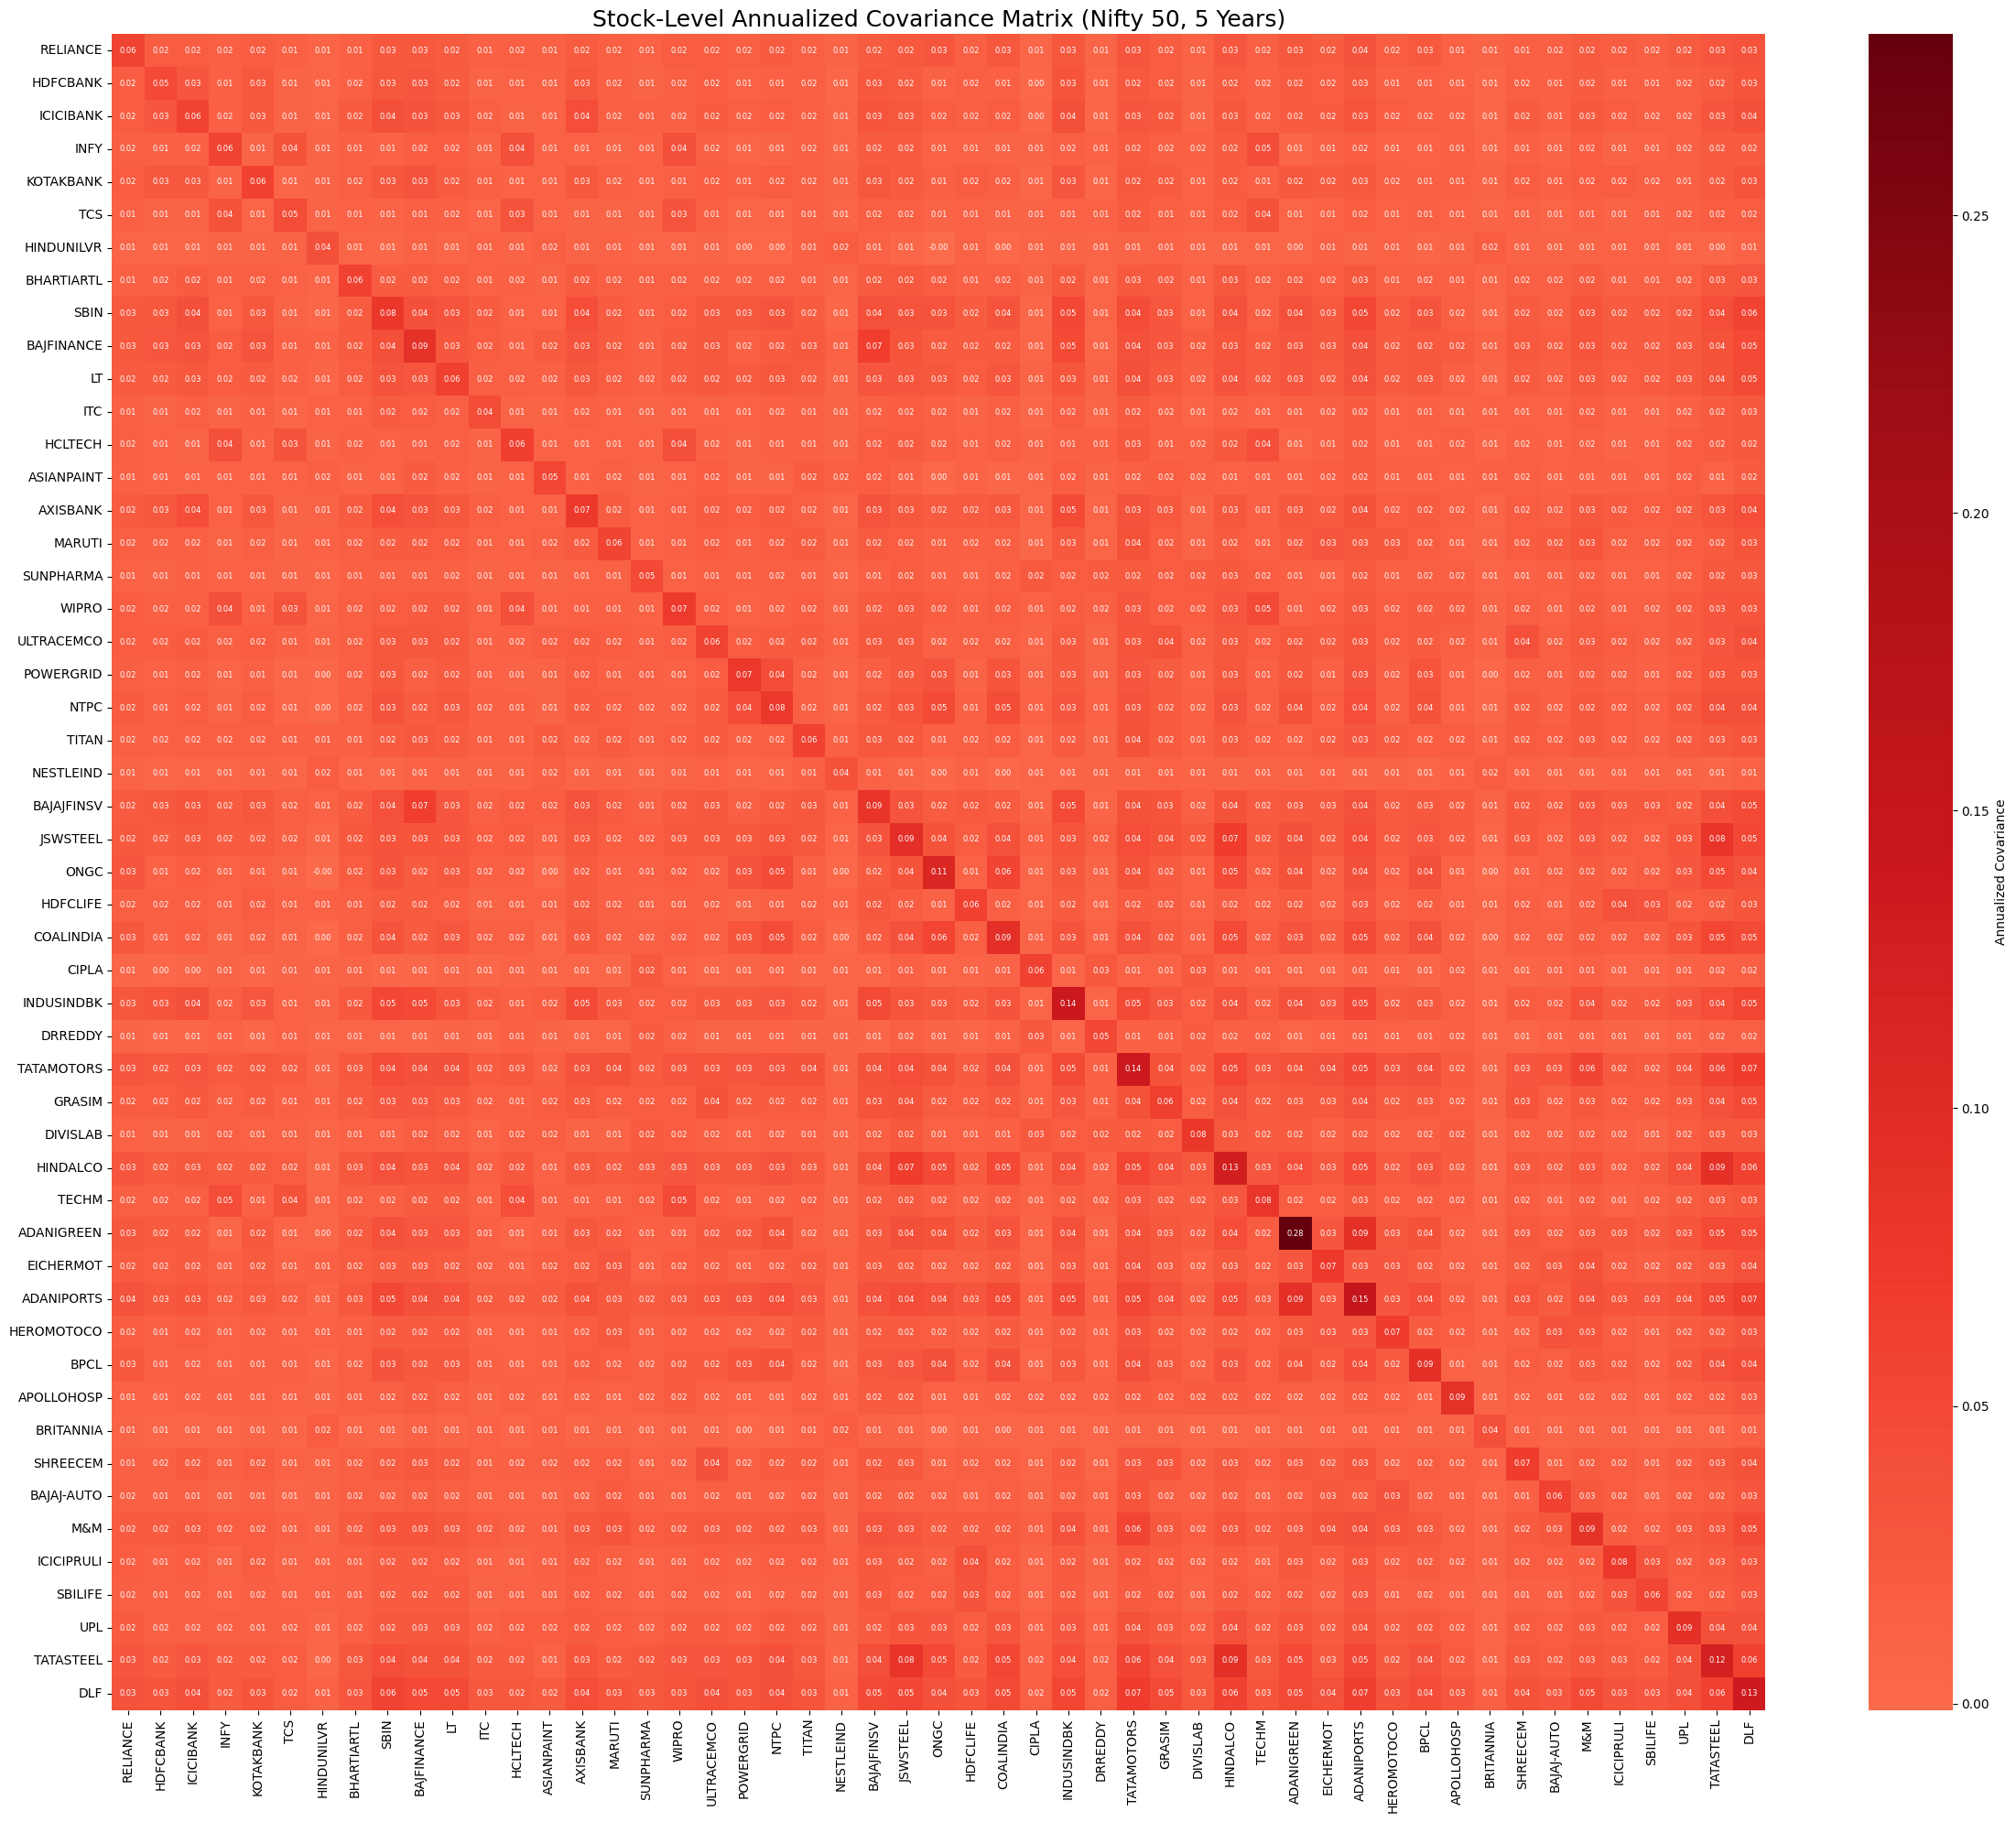

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute annualized covariance matrix (50×50)
cov_matrix_annual = returns_df.cov() * 252  # 252 trading days/year



plt.figure(figsize=(24, 20))
sns.heatmap(
    cov_matrix_annual,
    cmap="Reds",
    center=0,
    annot=True,               # Show covariance values
    fmt=".2f",                # Two decimal places
    annot_kws={"size": 6},    # Small font for readability
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'label': 'Annualized Covariance'}
)
plt.title("Stock-Level Annualized Covariance Matrix (Nifty 50, 5 Years)", fontsize=18)
plt.tight_layout()
plt.show()



Inter sector covariance

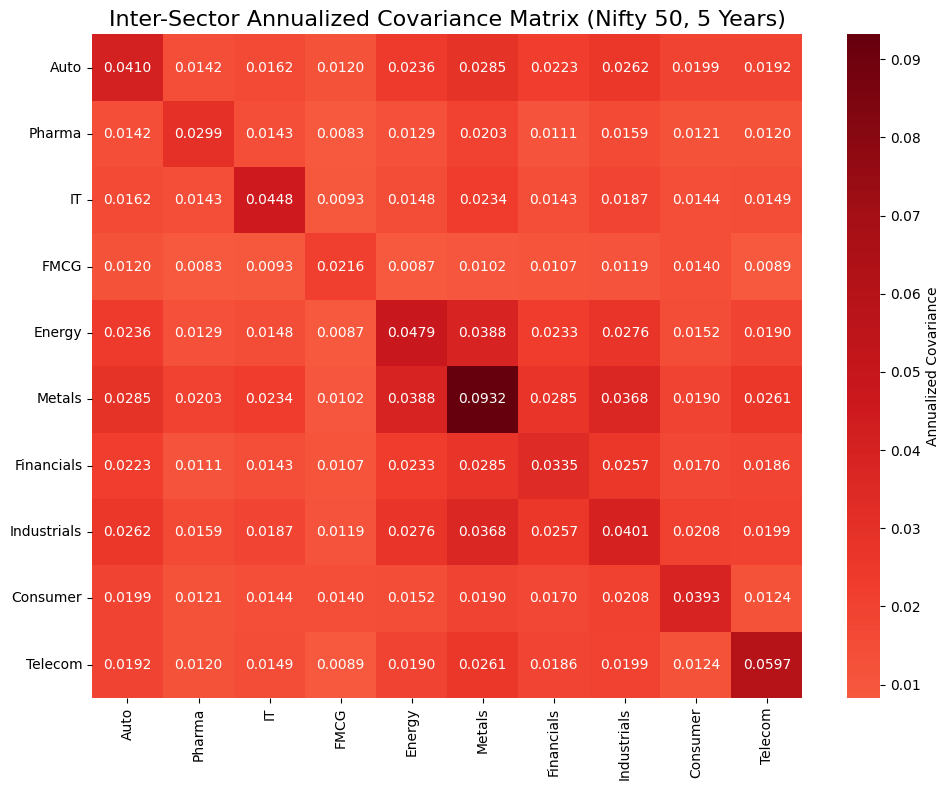

In [ ]:
# Compute and plot Inter-Sector Annualized Covariance Matrix (10×10)

# Step 1: Reuse sector-level average daily returns (from earlier)
sector_returns = pd.DataFrame(index=returns_df.index)

for sector in set(nifty50_sector_map.values()):
    sector_stocks = [s for s, sec in nifty50_sector_map.items() if sec == sector and s in returns_df.columns]
    if len(sector_stocks) == 0:
        continue
    sector_returns[sector] = returns_df[sector_stocks].mean(axis=1)

# Step 2: Compute annualized sector covariance matrix
sector_cov_matrix_annual = sector_returns.cov() * 252  # Annualized

# Step 3: Plot heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    sector_cov_matrix_annual,
    cmap="Reds",
    center=0,
    annot=True,                 # Show covariance values
    fmt=".4f",                  # Four decimals (covariance is usually small)
    annot_kws={"size": 10},     # Font size
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'label': 'Annualized Covariance'}
)
plt.title("Inter-Sector Annualized Covariance Matrix (Nifty 50, 5 Years)", fontsize=16)
plt.tight_layout()
plt.show()


Ranking top 7 sector-pair covariance

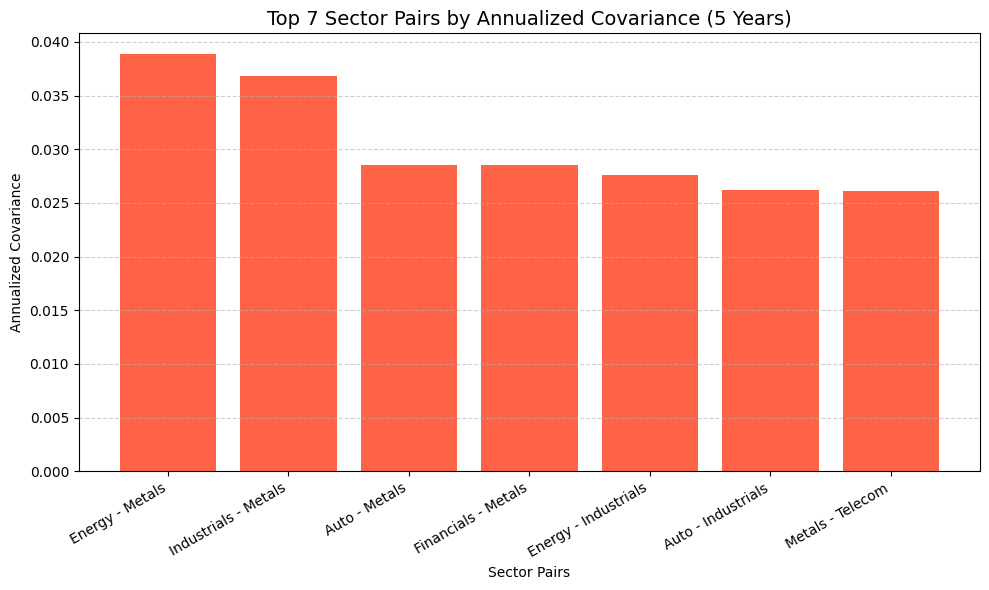

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Flatten the sector covariance matrix (remove self-covariance)
sector_cov_pairs = (
    sector_cov_matrix_annual.where(~np.eye(len(sector_cov_matrix_annual), dtype=bool))
    .stack()  # Convert to long format
    .reset_index()
)

sector_cov_pairs.columns = ["Sector 1", "Sector 2", "Covariance"]

# Step 2: Remove duplicate pairs (matrix is symmetric)
sector_cov_pairs = sector_cov_pairs.loc[sector_cov_pairs["Sector 1"] < sector_cov_pairs["Sector 2"]]

# Step 3: Sort by covariance (descending) and select top 7
top_7_cov_pairs = sector_cov_pairs.sort_values(by="Covariance", ascending=False).head(7)
top_7_cov_pairs["Pair"] = top_7_cov_pairs["Sector 1"] + " - " + top_7_cov_pairs["Sector 2"]

# Step 4: Plot vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_7_cov_pairs["Pair"], top_7_cov_pairs["Covariance"], color="tomato")

# Chart formatting
plt.title("Top 7 Sector Pairs by Annualized Covariance (5 Years)", fontsize=14)
plt.xlabel("Sector Pairs")
plt.ylabel("Annualized Covariance")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Minimum variance portfolio - long only strategy

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Step 1: Calculate annualized mean returns for each stock
mean_returns_annual = returns_df.mean() * 252  # 252 trading days

# Step 2: Define portfolio variance function
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Step 3: Set up optimization parameters
n_assets = len(returns_df.columns)
initial_weights = np.ones(n_assets) / n_assets  # Start with equal weights
bounds = [(0.0, 1.0) for _ in range(n_assets)]  # No short selling
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}  # Fully invested

# Step 4: Run optimization to minimize portfolio variance
opt_result = minimize(
    fun=portfolio_variance,
    x0=initial_weights,
    args=(cov_matrix_annual,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Step 5: Extract results
mvp_weights = opt_result.x
portfolio_volatility = np.sqrt(portfolio_variance(mvp_weights, cov_matrix_annual))
portfolio_return = np.dot(mvp_weights, mean_returns_annual)

# Print results
print("Minimum Variance Portfolio (MVP) Results:")
print(f"Portfolio Annualized Return: {portfolio_return:.4f}")
print(f"Portfolio Annualized Volatility: {portfolio_volatility:.4f}")
print("\nOptimal Weights for Each Stock:")
for stock, weight in zip(returns_df.columns, mvp_weights):
    print(f"{stock}: {weight:.4%}")


Minimum Variance Portfolio (MVP) Results:
Portfolio Annualized Return: 0.1486
Portfolio Annualized Volatility: 0.1148

Optimal Weights for Each Stock:
RELIANCE: 0.0416%
HDFCBANK: 8.9994%
ICICIBANK: 1.1996%
INFY: 0.0000%
KOTAKBANK: 0.8579%
TCS: 9.8649%
HINDUNILVR: 7.2379%
BHARTIARTL: 2.9953%
SBIN: 0.0000%
BAJFINANCE: 0.0000%
LT: 0.0000%
ITC: 7.7037%
HCLTECH: 0.0000%
ASIANPAINT: 2.5200%
AXISBANK: 0.0000%
MARUTI: 1.9981%
SUNPHARMA: 2.7143%
WIPRO: 0.0000%
ULTRACEMCO: 0.0000%
POWERGRID: 4.3561%
NTPC: 0.0000%
TITAN: 0.0000%
NESTLEIND: 9.1875%
BAJAJFINSV: 0.0000%
JSWSTEEL: 0.0000%
ONGC: 3.0800%
HDFCLIFE: 2.5659%
COALINDIA: 0.0476%
CIPLA: 7.7241%
INDUSINDBK: 0.0000%
DRREDDY: 6.8022%
TATAMOTORS: 0.0000%
GRASIM: 0.0000%
DIVISLAB: 0.5913%
HINDALCO: 0.0000%
TECHM: 0.0000%
ADANIGREEN: 0.0000%
EICHERMOT: 0.0000%
ADANIPORTS: 0.0000%
HEROMOTOCO: 0.0000%
BPCL: 0.0000%
APOLLOHOSP: 0.9692%
BRITANNIA: 11.5388%
SHREECEM: 0.4323%
BAJAJ-AUTO: 3.2981%
M&M: 0.0000%
ICICIPRULI: 0.0000%
SBILIFE: 3.2740%
UPL: 0.0

MVP - long short neutral strategy

In [ ]:
import numpy as np
from scipy.optimize import minimize

# --- Long-Short Market-Neutral MVP ---

# Bounds: allow each stock to have a max +/-5% allocation (adjustable)
bounds = [(-0.05, 0.05) for _ in range(n_assets)]

# Constraints:
# 1) Net exposure = 0 (market-neutral)
# 2) Gross exposure = 1 (sum of absolute weights normalized)
constraints = (
    {'type': 'eq', 'fun': lambda w: np.sum(w)},                # Net exposure 0
    {'type': 'eq', 'fun': lambda w: np.sum(np.abs(w)) - 1}     # Normalize gross leverage
)

# Initial guess: all zeros (no exposure)
initial_guess = np.zeros(n_assets)

# Optimization to minimize portfolio variance
opt_result_ls_neutral = minimize(
    fun=portfolio_variance,
    x0=initial_guess,
    args=(cov_matrix_annual,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract optimized weights
mvp_weights_ls_neutral = opt_result_ls_neutral.x
portfolio_volatility_ls_neutral = np.sqrt(portfolio_variance(mvp_weights_ls_neutral, cov_matrix_annual))
portfolio_return_ls_neutral = np.dot(mvp_weights_ls_neutral, mean_returns_annual)

# Display results
print("Long-Short Market-Neutral Minimum Variance Portfolio Results:")
print(f"Portfolio Annualized Return (Historical): {portfolio_return_ls_neutral:.4f}")
print(f"Portfolio Annualized Volatility: {portfolio_volatility_ls_neutral:.4f}")
print("\nOptimal Long/Short Weights (Market-Neutral):")
for stock, weight in zip(returns_df.columns, mvp_weights_ls_neutral):
    print(f"{stock}: {weight:.4%}")


Long-Short Market-Neutral Minimum Variance Portfolio Results:
Portfolio Annualized Return (Historical): -0.0004
Portfolio Annualized Volatility: 0.0305

Optimal Long/Short Weights (Market-Neutral):
RELIANCE: 2.8157%
HDFCBANK: 0.8093%
ICICIBANK: 0.0069%
INFY: 1.8471%
KOTAKBANK: 0.5667%
TCS: 1.7933%
HINDUNILVR: -4.6595%
BHARTIARTL: 1.2265%
SBIN: 1.8992%
BAJFINANCE: -1.4707%
LT: 1.8455%
ITC: 2.3591%
HCLTECH: 1.8474%
ASIANPAINT: -1.5445%
AXISBANK: 1.3982%
MARUTI: 1.9705%
SUNPHARMA: 2.5382%
WIPRO: 2.3571%
ULTRACEMCO: 0.8328%
POWERGRID: 1.2231%
NTPC: 2.7470%
TITAN: 2.4400%
NESTLEIND: -4.2605%
BAJAJFINSV: -2.0605%
JSWSTEEL: -4.1790%
ONGC: -2.3762%
HDFCLIFE: 1.1558%
COALINDIA: -2.6579%
CIPLA: -2.1091%
INDUSINDBK: -1.4888%
DRREDDY: -2.2115%
TATAMOTORS: -1.3098%
GRASIM: 2.4532%
DIVISLAB: 2.0208%
HINDALCO: 0.9296%
TECHM: -4.8824%
ADANIGREEN: 0.5211%
EICHERMOT: 1.3897%
ADANIPORTS: -1.9853%
HEROMOTOCO: 1.8536%
BPCL: -2.6256%
APOLLOHOSP: -1.5504%
BRITANNIA: -1.3509%
SHREECEM: 0.4152%
BAJAJ-AUTO: 1.2

MVP - long short non-neutral strategy

In [ ]:
# Long-Short Minimum Variance Portfolio (Not Market Neutral)

# Allow each stock to have up to +/-10% allocation (adjustable as needed)
bounds = [(-0.10, 0.10) for _ in range(n_assets)]

# Only one constraint: weights sum to 1 (so portfolio is scaled properly)
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

# Initial guess: start at equal weights but within bounds
initial_guess = np.ones(n_assets) / n_assets

# Optimization to minimize variance
opt_result_ls_non_neutral = minimize(
    fun=portfolio_variance,
    x0=initial_guess,
    args=(cov_matrix_annual,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract results
mvp_weights_ls_non_neutral = opt_result_ls_non_neutral.x
portfolio_volatility_ls_non_neutral = np.sqrt(portfolio_variance(mvp_weights_ls_non_neutral, cov_matrix_annual))
portfolio_return_ls_non_neutral = np.dot(mvp_weights_ls_non_neutral, mean_returns_annual)

# Display results
print("Long-Short (Not Neutral) Minimum Variance Portfolio Results:")
print(f"Portfolio Annualized Return (Historical): {portfolio_return_ls_non_neutral:.4f}")
print(f"Portfolio Annualized Volatility: {portfolio_volatility_ls_non_neutral:.4f}")
print("\nOptimal Long/Short Weights (Not Neutral):")
for stock, weight in zip(returns_df.columns, mvp_weights_ls_non_neutral):
    print(f"{stock}: {weight:.4%}")


Long-Short (Not Neutral) Minimum Variance Portfolio Results:
Portfolio Annualized Return (Historical): 0.1215
Portfolio Annualized Volatility: 0.1074

Optimal Long/Short Weights (Not Neutral):
RELIANCE: 2.3972%
HDFCBANK: 9.9847%
ICICIBANK: 3.7797%
INFY: 2.4327%
KOTAKBANK: 1.3162%
TCS: 10.0000%
HINDUNILVR: 5.2972%
BHARTIARTL: 4.2770%
SBIN: 3.2262%
BAJFINANCE: -2.4266%
LT: -0.2696%
ITC: 9.0030%
HCLTECH: 1.4307%
ASIANPAINT: 3.2356%
AXISBANK: -0.3116%
MARUTI: 4.9377%
SUNPHARMA: 4.6121%
WIPRO: -1.9561%
ULTRACEMCO: 1.6162%
POWERGRID: 4.9220%
NTPC: 0.2832%
TITAN: 1.0936%
NESTLEIND: 6.2746%
BAJAJFINSV: -0.3710%
JSWSTEEL: 0.1255%
ONGC: 3.4374%
HDFCLIFE: 4.2217%
COALINDIA: 3.7265%
CIPLA: 6.7519%
INDUSINDBK: -1.1960%
DRREDDY: 6.1191%
TATAMOTORS: -2.6712%
GRASIM: -1.0006%
DIVISLAB: 2.3121%
HINDALCO: -1.1192%
TECHM: -2.9845%
ADANIGREEN: 1.2072%
EICHERMOT: -1.6180%
ADANIPORTS: -4.7620%
HEROMOTOCO: -0.3932%
BPCL: 1.0414%
APOLLOHOSP: 2.3221%
BRITANNIA: 10.0000%
SHREECEM: 2.7119%
BAJAJ-AUTO: 5.3123%
M&

Plot all 3 strat portfolio weights

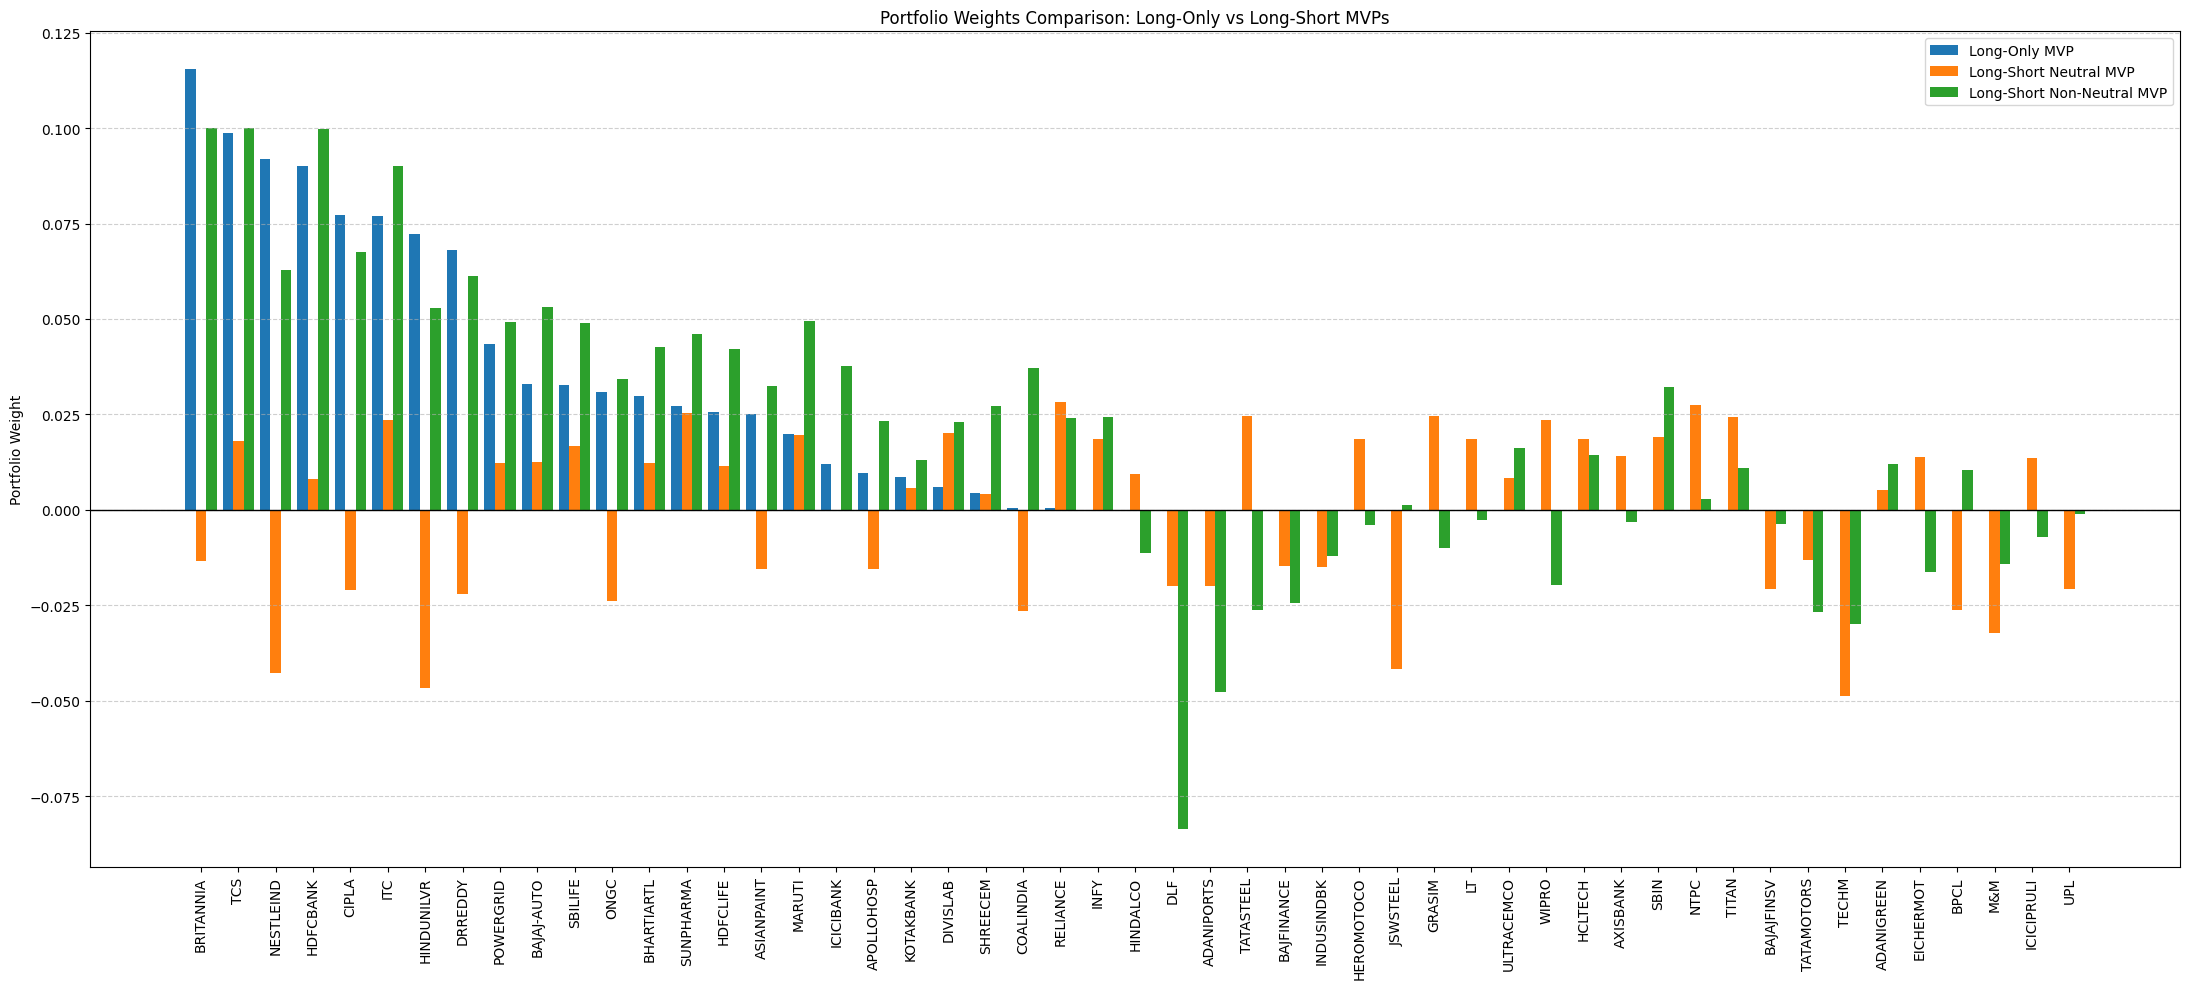

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DataFrame with weights for all 3 portfolios
weights_df = pd.DataFrame({
    'Stock': returns_df.columns,
    'Long-Only': mvp_weights,
    'Long-Short Neutral': mvp_weights_ls_neutral,
    'Long-Short Non-Neutral': mvp_weights_ls_non_neutral
})

# Sort stocks by Long-Only weight for cleaner visualization (optional)
weights_df = weights_df.sort_values(by='Long-Only', ascending=False).reset_index(drop=True)

# X-axis positions
x = np.arange(len(weights_df['Stock']))
bar_width = 0.28  # width of each bar
spacing = bar_width * 3 + 0.05

# Plot
plt.figure(figsize=(22, 10))

plt.bar(x - bar_width, weights_df['Long-Only'], width=bar_width, label='Long-Only MVP')
plt.bar(x, weights_df['Long-Short Neutral'], width=bar_width, label='Long-Short Neutral MVP')
plt.bar(x + bar_width, weights_df['Long-Short Non-Neutral'], width=bar_width, label='Long-Short Non-Neutral MVP')

# Chart formatting
plt.xticks(x, weights_df['Stock'], rotation=90)
plt.axhline(0, color='black', linewidth=1)  # baseline for shorts
plt.ylabel("Portfolio Weight")
plt.title("Portfolio Weights Comparison: Long-Only vs Long-Short MVPs")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Fetch and compute Nifty50 index 5yr returns

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

# Date range for last 5 years
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Fetch Nifty 50 index historical data (symbol for Kite is NIFTY 50)
nifty_symbol = "NSE:NIFTY 50"
nifty_token = kite.ltp(nifty_symbol)[nifty_symbol]['instrument_token']

# Get daily OHLC data for Nifty 50
nifty_data = kite.historical_data(
    instrument_token=nifty_token,
    from_date=start_date.strftime("%Y-%m-%d"),
    to_date=end_date.strftime("%Y-%m-%d"),
    interval="day",
    continuous=False
)

# Convert to DataFrame
nifty_df = pd.DataFrame(nifty_data)

# Compute daily returns
nifty_df['daily_return'] = nifty_df['close'].pct_change()

# Compute cumulative returns (starting at 0)
nifty_df['cumulative_return'] = (1 + nifty_df['daily_return']).cumprod() - 1

# Keep only relevant columns
nifty_df = nifty_df[['date', 'close', 'daily_return', 'cumulative_return']]

# Display the final cumulative return
final_cum_return = nifty_df['cumulative_return'].iloc[-1]
print(f"Nifty 50 5-Year Cumulative Return: {final_cum_return:.2%}")

# Preview the data
display(nifty_df.tail())


Nifty 50 5-Year Cumulative Return: 124.36%


,date,close,daily_return,cumulative_return
1238,2025-07-24 00:00:00+05:30,25062.10,-0.006257,1.263260
1239,2025-07-25 00:00:00+05:30,24837.00,-0.008982,1.242932
1240,2025-07-28 00:00:00+05:30,24680.90,-0.006285,1.228836
1241,2025-07-29 00:00:00+05:30,24821.10,0.005681,1.241497
1242,2025-07-30 00:00:00+05:30,24844.55,0.000945,1.243614


Growth curve for 3 portfolios vs Nifty 50 index benchmark

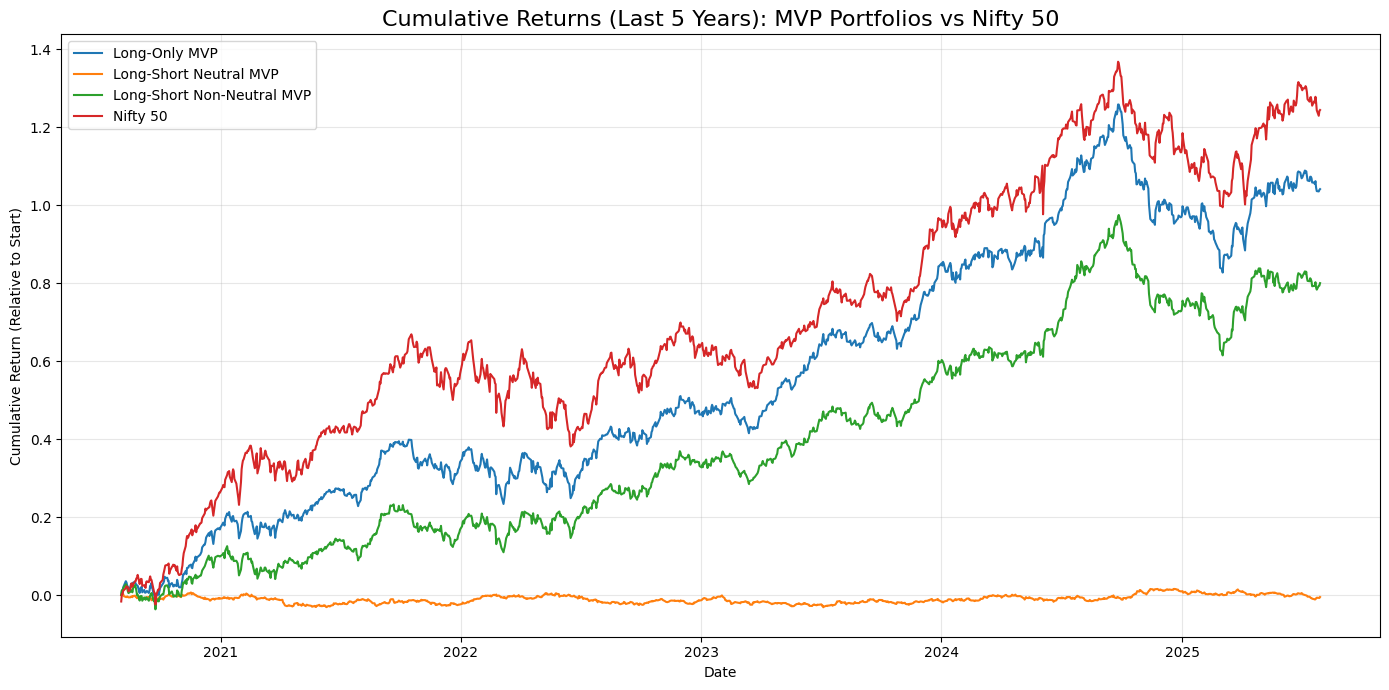

/tmp/ipython-input-30-375423840.py:113: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df = summary_df.applymap(lambda x: round(x, 4))


,Long-Only MVP,Long-Short Neutral MVP,Long-Short Non-Neutral MVP,Nifty 50
Cumulative Return (5Y),1.0408,-0.0050,0.7999,1.2436
Annualized Return (CAGR),0.1557,-0.0010,0.1266,0.1782
Annualized Volatility,0.1146,0.0305,0.1071,0.1450
Sharpe Ratio,1.3589,-0.0332,1.1824,1.2287
Sortino Ratio,2.0029,-0.0550,1.8411,1.6577
Calmar Ratio,0.8160,-0.0268,0.6948,1.0341
Max Drawdown,-0.1909,-0.0377,-0.1823,-0.1723
Win Rate (%),56.0386,50.0805,53.7037,55.1530
Best Daily Return (%),3.0597,0.7338,2.8258,4.7423
Worst Daily Return (%),-3.4377,-0.7265,-3.1225,-5.9294


In [ ]:
# Step 0: Rebuild synthetic price series (rebased to 1) from returns_df
# returns_df already has daily returns for all 50 stocks

stock_prices_df = (1 + returns_df).cumprod()  # normalized prices
stock_prices_df.index = returns_df.index  # ensure dates align

# Step 1: Calculate each portfolio's daily returns (buy-and-hold)
def compute_portfolio_returns(weights, price_data):
    daily_returns = price_data.pct_change().fillna(0)
    return (daily_returns @ weights)

# Compute daily portfolio returns for each strategy
long_only_returns = compute_portfolio_returns(mvp_weights, stock_prices_df)
ls_neutral_returns = compute_portfolio_returns(mvp_weights_ls_neutral, stock_prices_df)
ls_non_neutral_returns = compute_portfolio_returns(mvp_weights_ls_non_neutral, stock_prices_df)

# Step 2: Compute cumulative growth curves
def cumulative_growth(returns):
    return (1 + returns).cumprod() - 1

long_only_cum = cumulative_growth(long_only_returns)
ls_neutral_cum = cumulative_growth(ls_neutral_returns)
ls_non_neutral_cum = cumulative_growth(ls_non_neutral_returns)
nifty_cum = nifty_df.set_index('date')['cumulative_return']

# Step 3: Combine into one DataFrame
cum_returns_df = pd.DataFrame({
    'Long-Only MVP': long_only_cum,
    'Long-Short Neutral MVP': ls_neutral_cum,
    'Long-Short Non-Neutral MVP': ls_non_neutral_cum,
    'Nifty 50': nifty_cum
})

# Step 4: Plot cumulative returns
plt.figure(figsize=(14, 7))
for col in cum_returns_df.columns:
    plt.plot(cum_returns_df.index, cum_returns_df[col], label=col)

plt.title("Cumulative Returns (Last 5 Years): MVP Portfolios vs Nifty 50", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Relative to Start)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Combine all daily returns into one DataFrame
daily_returns_df = pd.DataFrame({
    'Long-Only MVP': long_only_returns,
    'Long-Short Neutral MVP': ls_neutral_returns,
    'Long-Short Non-Neutral MVP': ls_non_neutral_returns,
    'Nifty 50': nifty_df.set_index('date')['daily_return']
}).dropna()

# Helper function to compute metrics for a single return series
def compute_backtest_metrics(returns):
    cumulative_return = ((1 + returns).prod() - 1)
    years = len(returns) / 252
    cagr = ((1 + cumulative_return) ** (1 / years) - 1)
    annual_vol = returns.std() * np.sqrt(252)

    sharpe = cagr / annual_vol if annual_vol != 0 else np.nan

    downside_returns = returns[returns < 0]
    downside_vol = downside_returns.std() * np.sqrt(252)
    sortino = cagr / downside_vol if downside_vol != 0 else np.nan

    cum_curve = (1 + returns).cumprod()
    rolling_max = cum_curve.cummax()
    drawdowns = (cum_curve - rolling_max) / rolling_max
    max_dd = drawdowns.min()
    calmar = cagr / abs(max_dd) if max_dd != 0 else np.nan

    win_rate = (returns > 0).mean() * 100
    best_day = returns.max() * 100
    worst_day = returns.min() * 100
    var_95 = np.percentile(returns, 5) * 100

    skewness_val = skew(returns)
    kurtosis_val = kurtosis(returns)

    return [
        cumulative_return, cagr, annual_vol, sharpe, sortino, calmar, max_dd,
        win_rate, best_day, worst_day, var_95, skewness_val, kurtosis_val
    ]

# Metric names for the table
metrics = [
    "Cumulative Return (5Y)",
    "Annualized Return (CAGR)",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio",
    "Calmar Ratio",
    "Max Drawdown",
    "Win Rate (%)",
    "Best Daily Return (%)",
    "Worst Daily Return (%)",
    "95% Daily VaR (5%)",
    "Skewness",
    "Kurtosis"
]

# Compute metrics for each portfolio and store as columns
summary_data = {col: compute_backtest_metrics(daily_returns_df[col]) for col in daily_returns_df.columns}
summary_df = pd.DataFrame(summary_data, index=metrics)

# Round for readability
summary_df = summary_df.applymap(lambda x: round(x, 4))

# Display final table
display(summary_df)



Long only tangency portfolio (max-sharpe)

In [41]:
from scipy.optimize import minimize

# Step 1: Mean returns (annual) and covariance matrix (annual) already computed:
# mean_returns_annual, cov_matrix_annual

# Objective function: Negative Sharpe Ratio (to minimize)
def neg_sharpe_ratio(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    if portfolio_volatility == 0:
        return np.inf
    return -portfolio_return / portfolio_volatility  # maximize Sharpe

# Constraints: weights sum to 1 (fully invested), long-only (0 ≤ w ≤ 5%)
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0.0, 0.05) for _ in range(len(mean_returns_annual)))  # 5% cap per stock
initial_guess = np.ones(len(mean_returns_annual)) / len(mean_returns_annual)  # start equal-weighted

# Step 2: Optimization
opt_result_tangency_long_capped = minimize(
    neg_sharpe_ratio,
    initial_guess,
    args=(mean_returns_annual, cov_matrix_annual),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Step 3: Extract optimal weights
tangency_weights_long_capped = opt_result_tangency_long_capped.x

# Step 4: Compute portfolio stats
tangency_return_long_capped = np.dot(tangency_weights_long_capped, mean_returns_annual)
tangency_vol_long_capped = np.sqrt(np.dot(tangency_weights_long_capped.T, np.dot(cov_matrix_annual, tangency_weights_long_capped)))
tangency_sharpe_long_capped = tangency_return_long_capped / tangency_vol_long_capped

print("Long-Only Tangency Portfolio (Max Sharpe, 5% Cap per Stock) Results:")
print(f"Annualized Return: {tangency_return_long_capped:.4f}")
print(f"Annualized Volatility: {tangency_vol_long_capped:.4f}")
print(f"Sharpe Ratio: {tangency_sharpe_long_capped:.4f}")
print("\nOptimal Weights for Each Stock (Capped at 5%):")
for stock, weight in zip(returns_df.columns, tangency_weights_long_capped):
    print(f"{stock}: {weight:.4%}")

# Step 5: Backtest daily returns and cumulative growth
tangency_long_capped_returns = (returns_df @ tangency_weights_long_capped).fillna(0)
tangency_long_capped_cumulative = (1 + tangency_long_capped_returns).cumprod() - 1


Long-Only Tangency Portfolio (Max Sharpe, 5% Cap per Stock) Results:
Annualized Return: 0.2848
Annualized Volatility: 0.1467
Sharpe Ratio: 1.9408

Optimal Weights for Each Stock (Capped at 5%):
RELIANCE: 0.0000%
HDFCBANK: 0.0000%
ICICIBANK: 5.0000%
INFY: 0.0000%
KOTAKBANK: 0.0000%
TCS: 0.0000%
HINDUNILVR: 0.0000%
BHARTIARTL: 5.0000%
SBIN: 4.7744%
BAJFINANCE: 0.0000%
LT: 5.0000%
ITC: 5.0000%
HCLTECH: 3.3190%
ASIANPAINT: 0.0000%
AXISBANK: 0.0000%
MARUTI: 0.0000%
SUNPHARMA: 5.0000%
WIPRO: 0.0000%
ULTRACEMCO: 2.0940%
POWERGRID: 4.8638%
NTPC: 5.0000%
TITAN: 5.0000%
NESTLEIND: 0.0000%
BAJAJFINSV: 0.0000%
JSWSTEEL: 4.9977%
ONGC: 3.0940%
HDFCLIFE: 0.0000%
COALINDIA: 0.0000%
CIPLA: 5.0000%
INDUSINDBK: 0.0000%
DRREDDY: 0.0000%
TATAMOTORS: 4.6256%
GRASIM: 5.0000%
DIVISLAB: 5.0000%
HINDALCO: 0.0000%
TECHM: 0.0000%
ADANIGREEN: 2.2314%
EICHERMOT: 0.0000%
ADANIPORTS: 0.0000%
HEROMOTOCO: 0.0000%
BPCL: 0.0000%
APOLLOHOSP: 5.0000%
BRITANNIA: 5.0000%
SHREECEM: 0.0000%
BAJAJ-AUTO: 5.0000%
M&M: 5.0000%
ICI

Growth curve and backtest results for all strat portfolios vs Nifty50 benchmark

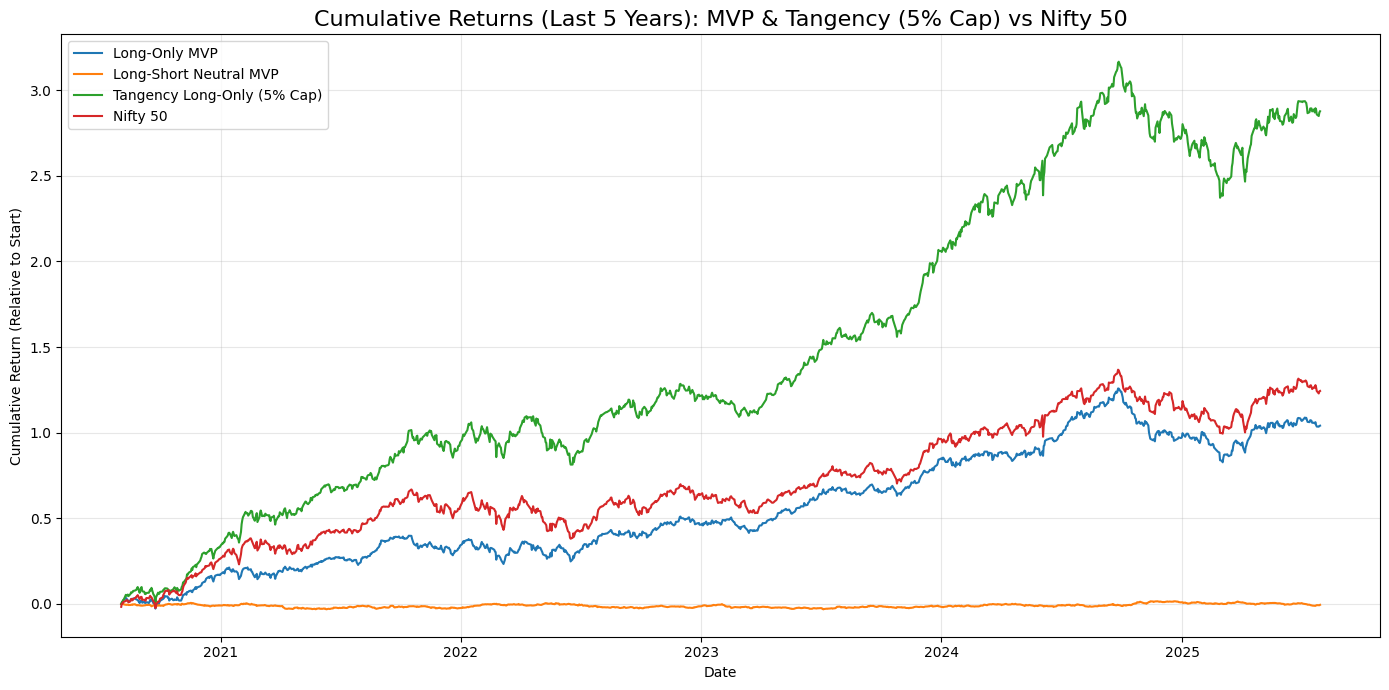

/tmp/ipython-input-42-1925504104.py:129: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df = pd.DataFrame(summary_data, index=metrics).applymap(lambda x: round(x, 4))


,Long-Only MVP,Long-Short Neutral MVP,Tangency Long-Only (5% Cap),Nifty 50
Cumulative Return (5Y),1.0408,-0.0050,2.8759,1.2436
Annualized Return (CAGR),0.1557,-0.0010,0.3164,0.1782
Annualized Volatility,0.1146,0.0305,0.1467,0.1450
Sharpe Ratio,1.3589,-0.0332,2.1565,1.2287
Sortino Ratio,2.0029,-0.0550,2.8432,1.6577
Calmar Ratio,0.8160,-0.0268,1.6596,1.0341
Max Drawdown,-0.1909,-0.0377,-0.1906,-0.1723
Win Rate (%),56.0386,50.0805,58.6957,55.1530
Best Daily Return (%),3.0597,0.7338,4.5458,4.7423
Worst Daily Return (%),-3.4377,-0.7265,-5.6257,-5.9294


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.optimize import minimize

# --- Helper: Negative Sharpe Ratio objective ---
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.0):
    port_return = np.dot(weights, mean_returns) - risk_free_rate
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -port_return / port_vol if port_vol != 0 else 1e6

# --- Long-Only Tangency Portfolio (Max Sharpe, 5% Cap per Stock) ---
bounds_long_only = [(0.0, 0.05) for _ in range(len(mean_returns_annual))]  # 5% max weight
constraints_long_only = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})   # fully invested
initial_guess = np.array([1/len(mean_returns_annual)] * len(mean_returns_annual))

opt_long_only = minimize(
    neg_sharpe_ratio,
    initial_guess,
    args=(mean_returns_annual, cov_matrix_annual),
    method='SLSQP',
    bounds=bounds_long_only,
    constraints=constraints_long_only
)
tangency_weights_long_capped = opt_long_only.x

# --- Step 0: Rebuild synthetic price series (rebased to 1) ---
stock_prices_df = (1 + returns_df).cumprod()
stock_prices_df.index = returns_df.index

# --- Step 1: Compute daily returns for all portfolios ---
def compute_portfolio_returns(weights, price_data):
    daily_returns = price_data.pct_change().fillna(0)
    return (daily_returns @ weights)

# MVP portfolios
long_only_returns = compute_portfolio_returns(mvp_weights, stock_prices_df)
ls_neutral_returns = compute_portfolio_returns(mvp_weights_ls_neutral, stock_prices_df)

# Tangency portfolio (Long-Only, 5% cap)
tangency_long_capped_returns = compute_portfolio_returns(tangency_weights_long_capped, stock_prices_df)

# --- Step 2: Compute cumulative returns ---
def cumulative_growth(returns):
    return (1 + returns).cumprod() - 1

long_only_cum = cumulative_growth(long_only_returns)
ls_neutral_cum = cumulative_growth(ls_neutral_returns)
tangency_long_capped_cum = cumulative_growth(tangency_long_capped_returns)
nifty_cum = nifty_df.set_index('date')['cumulative_return']

# --- Step 3: Combine into one DataFrame ---
cum_returns_df = pd.DataFrame({
    'Long-Only MVP': long_only_cum,
    'Long-Short Neutral MVP': ls_neutral_cum,
    'Tangency Long-Only (5% Cap)': tangency_long_capped_cum,
    'Nifty 50': nifty_cum
})

# --- Step 4: Plot cumulative returns ---
plt.figure(figsize=(14, 7))
for col in cum_returns_df.columns:
    plt.plot(cum_returns_df.index, cum_returns_df[col], label=col)

plt.title("Cumulative Returns (Last 5 Years): MVP & Tangency (5% Cap) vs Nifty 50", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Relative to Start)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Step 5: Backtest Summary Table ---
daily_returns_df = pd.DataFrame({
    'Long-Only MVP': long_only_returns,
    'Long-Short Neutral MVP': ls_neutral_returns,
    'Tangency Long-Only (5% Cap)': tangency_long_capped_returns,
    'Nifty 50': nifty_df.set_index('date')['daily_return']
}).dropna()

def compute_backtest_metrics(returns):
    cumulative_return = ((1 + returns).prod() - 1)
    years = len(returns) / 252
    cagr = ((1 + cumulative_return) ** (1 / years) - 1)
    annual_vol = returns.std() * np.sqrt(252)
    sharpe = cagr / annual_vol if annual_vol != 0 else np.nan

    downside_returns = returns[returns < 0]
    downside_vol = downside_returns.std() * np.sqrt(252)
    sortino = cagr / downside_vol if downside_vol != 0 else np.nan

    cum_curve = (1 + returns).cumprod()
    rolling_max = cum_curve.cummax()
    drawdowns = (cum_curve - rolling_max) / rolling_max
    max_dd = drawdowns.min()
    calmar = cagr / abs(max_dd) if max_dd != 0 else np.nan

    win_rate = (returns > 0).mean() * 100
    best_day = returns.max() * 100
    worst_day = returns.min() * 100
    var_95 = np.percentile(returns, 5) * 100

    skewness_val = skew(returns)
    kurtosis_val = kurtosis(returns)

    return [
        cumulative_return, cagr, annual_vol, sharpe, sortino, calmar, max_dd,
        win_rate, best_day, worst_day, var_95, skewness_val, kurtosis_val
    ]

metrics = [
    "Cumulative Return (5Y)",
    "Annualized Return (CAGR)",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio",
    "Calmar Ratio",
    "Max Drawdown",
    "Win Rate (%)",
    "Best Daily Return (%)",
    "Worst Daily Return (%)",
    "95% Daily VaR (5%)",
    "Skewness",
    "Kurtosis"
]

summary_data = {col: compute_backtest_metrics(daily_returns_df[col]) for col in daily_returns_df.columns}
summary_df = pd.DataFrame(summary_data, index=metrics).applymap(lambda x: round(x, 4))

display(summary_df)
